# Лабораторная работа 2.10: Гиперболическое уравнение (волновое уравнение)

## Формулировка задачи

Решается одномерное волновое уравнение:

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$

где:
- $u(x,t)$ - смещение струны в точке $x$ в момент времени $t$
- $c = 1.0$ - скорость распространения волны
- $x \in [0, 1]$ - пространственная координата вдоль струны
- $t \geq 0$ - время

**Граничные условия:**
- $u(0, t) = 0$ - левый конец струны закреплен
- $u(1, t) = 0$ - правый конец струны закреплен

**Начальные условия:**
- $u(x, 0) = \sin(\pi x)$ - начальная форма струны
- $\frac{\partial u}{\partial t}(x, 0) = 0$ - струна в начальный момент покоится

---

## Аналитическое решение

Решение находится методом разделения переменных. Для однородных граничных условий решение имеет вид:

$$u(x, t) = \sin(\pi x) \cos(\pi t)$$

Это решение описывает **стоячую волну** с частотой $\pi$ и формой $\sin(\pi x)$. Волна колеблется между положительными и отрицательными значениями, сохраняя амплитуду (нет затухания).

---

## Численный алгоритм (явная схема)

Используется **явная схема конечных разностей**:

1. **Дискретизация:**
   - Пространственная производная: $\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$
   - Временная производная: $\frac{\partial^2 u}{\partial t^2} \approx \frac{u_i^{n+1} - 2u_i^n + u_i^{n-1}}{\Delta t^2}$

2. **Разностная схема:**
   $$u_i^{n+1} = 2u_i^n - u_i^{n-1} + r^2 \cdot (u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$
   
   где $r = c \frac{\Delta t}{\Delta x}$ - число Куранта

3. **Условие устойчивости (CFL - Курант-Фридрихс-Леви):**
   $$r = c \frac{\Delta t}{\Delta x} \leq 1.0$$
   
   В коде используется $r = 0.9$ для обеспечения устойчивости.

4. **Алгоритм:**
   - Инициализация начального условия $u(x,0) = \sin(\pi x)$
   - Вычисление первого временного слоя: $u_i^1 = u_i^0$ (так как $u_t(x,0) = 0$)
   - Для каждого временного слоя $n \geq 1$:
     - Обновление внутренних точек по разностной схеме
     - Применение граничных условий: $u_0^{n+1} = 0$, $u_{N_x-1}^{n+1} = 0$


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
L = 1.0
T = 2.0
Nx = 50
dx = L / (Nx - 1)
c = 1.0

# Шаг по времени для устойчивости
dt = 0.9 * dx / c
Nt = int(T / dt) + 1

x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)


In [26]:
# Аналитическое решение
def u_analytical(x_val, t_val):
    return np.sin(np.pi * x_val) * np.cos(np.pi * t_val)

u_analytical_grid = np.zeros((Nt, Nx))
for n in range(Nt):
    for i in range(Nx):
        u_analytical_grid[n, i] = u_analytical(x[i], t[n])


In [27]:
# Численное решение
u = np.zeros((Nt, Nx))

# Начальные условия
u[0, :] = np.sin(np.pi * x)
u[1, :] = u[0, :]

# Численное решениеs
r = c * dt / dx
for n in range(1, Nt - 1):
    # Граничные условия
    u[n, 0] = 0
    u[n, -1] = 0
    
    # Обновление внутренних точек
    for i in range(1, Nx - 1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + r**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])


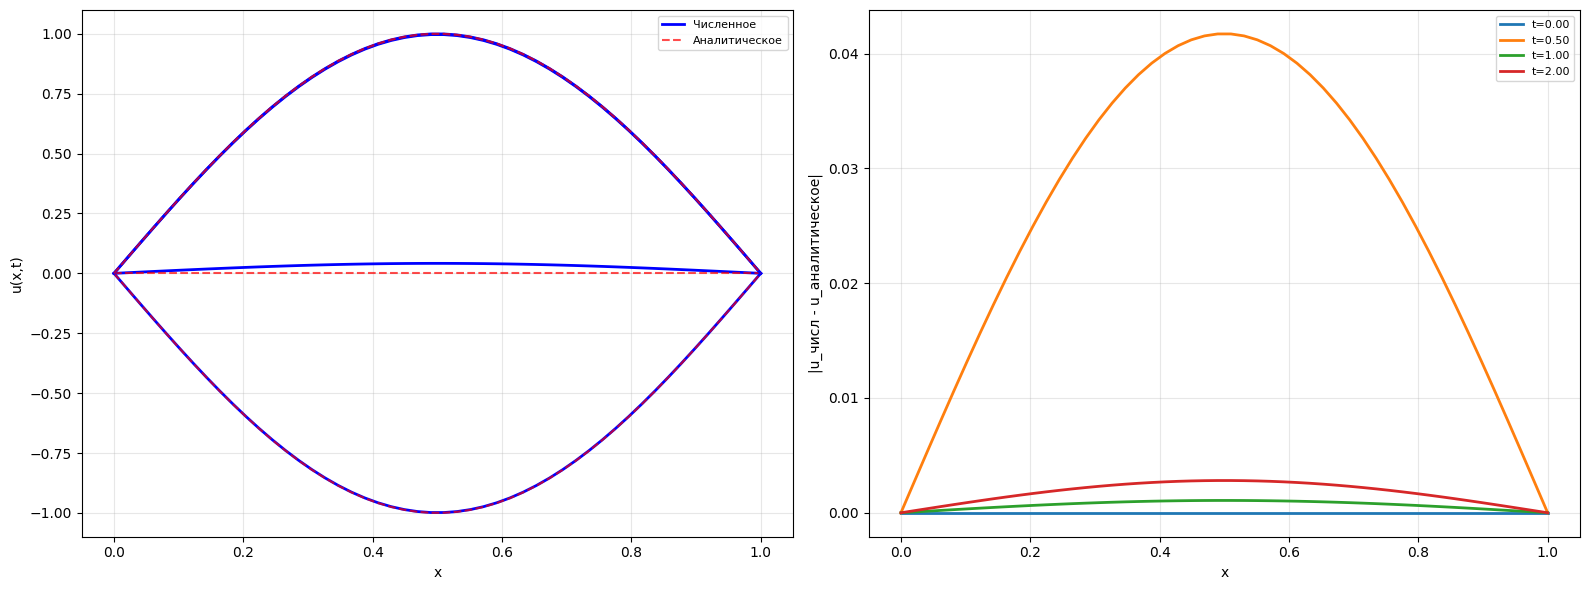

In [ ]:
# Сравнение решений
time_indices = [0, Nt//4, Nt//2, Nt-1]
error = np.abs(u - u_analytical_grid)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for idx in time_indices:
    if idx == time_indices[0]:
        ax1.plot(x, u[idx, :], 'b-', label='Численное', linewidth=2)
        ax1.plot(x, u_analytical_grid[idx, :], 'r--', label='Аналитическое', linewidth=1.5, alpha=0.7)
    else:
        ax1.plot(x, u[idx, :], 'b-', linewidth=2)
        ax1.plot(x, u_analytical_grid[idx, :], 'r--', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('x')
ax1.set_ylabel('u(x,t)')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

for idx in time_indices:
    ax2.plot(x, error[idx, :], label=f't={t[idx]:.2f}', linewidth=2)
ax2.set_xlabel('x')
ax2.set_ylabel('|u_числ - u_аналитическое|')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
